In [199]:
import numpy as np
import scipy.sparse as sp
import scipy as sc
import matplotlib.pyplot as plt
import imageio

In [203]:
def Thomas_method(A, f):
    '''
    method solves the linear system with tridiagonal matrix of coefficients
    by using special approach of Gaussian elimination.
    Input: A - np.array() of size n-by-n - matrix of the linear system
           f - np.array() of size n-by-1 - vector of rhs
    Output: x - np.array() of size n-by-1 - solution of the system
    '''
    n = np.shape(A)[0]
    L = np.diag(np.ones(n,dtype='c16'))
    U = np.zeros((n,n),dtype='c16')
    y = np.zeros(n,dtype='c16')
    x = np.zeros(n,dtype='c16')
    
    U[0,0] = A[0,0]
    U[0,1] = A[0,1]
    y[0] = f[0]
    
    for i in range(1,n):
        beta_i = A[i,i-1]/U[i-1,i-1]
        alpha_i = A[i,i] - beta_i*A[i-1,i]
        L[i,i-1] = beta_i
        U[i,i] = alpha_i
        U[i-1,i] = A[i-1,i]
        y[i] = f[i]-beta_i*y[i-1]
    
    x[n-1] = y[n-1]/U[n-1,n-1]
    
    for i in range(n-2,-1,-1):
        x[i] = (y[i]-A[i,i+1]*x[i+1])/U[i,i]
    
    return x

In [55]:
def get_Hamiltonian(dt, dx, x, m=1, hdot=1, potential = 'none'):
    '''
    returns H - Hamiltonian for lhs and H_rhs - Hamiltonian for rhs parts of Crank-Nicolson method
    '''
    
    dj = 1+1j*dt*hdot/(2*m*dx**2) #elenemts on the main diagonal of H
    oj = -1j*dt*hdot/(4*m*dx**2) #elements on the upper and lower diagonal of H
    diagonal = np.ones(len(x), dtype=complex)*dj
    off_diagonal = np.ones(len(x)-1,dtype = complex)*oj
    
    H = sp.diags((off_diagonal,diagonal,off_diagonal),[-1,0,1]).toarray()
    
    dj_rhs = 1-1j*dt*hdot/(2*m*dx**2) #elenemts on the main diagonal of H_rhs
    oj_rhs = 1j*dt*hdot/(4*m*dx**2) #elements on the upper and lower diagonal of H_rhs
    diagonal_rhs = np.ones(len(x), dtype=complex)*dj
    off_diagonal_rhs = np.ones(len(x)-1,dtype = complex)*oj

    H_rhs = sp.diags((off_diagonal_rhs,diagonal_rhs,off_diagonal_rhs),[-1,0,1]).toarray()
    
    if potential == 'none':
        return H, H_rhs
    
    if potential == 'QHO':
        V, V_rhs = QHO(dt,x)
        
        H += V
        H_rhs += V_rhs
        
        return H, H_rhs
    
    if potential == 'DWP':
        V, V_rhs = DWP(x)
        
        H += V
        H_rhs += V_rhs
        
        return H, H_rhs

In [56]:
def QHO(dt,x, m=1, w=1):
    '''
    potential of quantum harmonic oscillator
    '''
    
    v_diagonal = np.ones(len(x),dtype=complex)
    V = np.diag(v_diagonal)

    for ind, xi in enumerate(x):
        V[ind,ind] = 1j*dt*m*w**2*x[ind]**2/4
    
    v_diagonal_rhs = np.ones(len(x),dtype=complex)
    V_rhs = np.diag(v_diagonal)

    for ind, xi in enumerate(x):
        V_rhs[ind,ind] = -1j*dt*m*w**2*x[ind]**2/4 
        
    return V, V_rhs

In [57]:
def DWP(x,x0=2,a=1):
    '''
    double well potential
    '''
    
    v_diagonal = np.ones(len(x),dtype=complex)
    V = np.diag(v_diagonal)

    for ind, xi in enumerate(x):
        V[ind,ind] = 1j*dt*a/x0**4*(x[ind]**2-x0**2)**2/2
    
    v_diagonal_rhs = np.ones(len(x),dtype=complex)
    V_rhs = np.diag(v_diagonal)

    for ind, xi in enumerate(x):
        V_rhs[ind,ind] = -1j*dt*a/x0**4*(x[ind]**2-x0**2)**2/2
        
    return V, V_rhs

In [58]:
def gaus(x,sigma=1,mu=0,p0=0,h=1):
    '''
    initial conditions at t=0 as Gaussian wave packet
    '''
    psi = 1/(np.pi**(1/4)*np.sqrt(sigma))*np.exp(-(x-mu)**2/(2*sigma**2))*np.exp(1j*p0*x/h)
    return psi

In [181]:
hdot = 1
w = 1
m = 1
dt = 1
dx = 0.1
x = np.arange(-10,10,dx)

In [182]:
H,H_rhs = get_Hamiltonian(dt,dx,x,potential="none")

In [183]:
initial_cond = gaus(x,sigma=1)

In [184]:
b = np.dot(H_rhs,initial_cond)

In [185]:
res = np.zeros((100,len(x)),dtype = complex)
res[0,:] = Thomas_method(H,b)

for i in range(1,100-1):
    res[i,:] = Thomas_method(H,res[i-1,:])

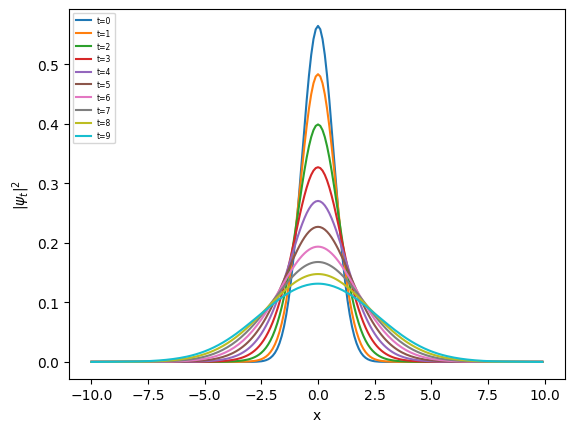

In [186]:
for i in range(0,10,1):
    plt.plot(x,np.abs(res[i,:])**2, label=f't={i}')
plt.legend(loc=2, prop={'size': 5.5})
plt.xlabel('x')
plt.ylabel('$|\psi_t|^2$');

## 2D Case

In [1154]:
def get_Hamiltonian2D(x, dt=1, dx=1, m=1, hdot=1, potential = 'none'):
    '''
    returns H - Hamiltonian for lhs and H_rhs - Hamiltonian for rhs parts of Crank-Nicolson method
    '''
    
    dj = 1+1j*dt*hdot/(2*m*dx**2) #elenemts on the main diagonal of H
    oj = -1j*dt*hdot/(4*m*dx**2) #elements on the upper and lower diagonal of H
    diagonal = np.ones(len(x), dtype=complex)*dj
    off_diagonal = np.ones(len(x)-1,dtype = complex)*oj
    
    H = sp.diags((off_diagonal,diagonal,off_diagonal),[-1,0,1]).toarray()
    
    dj_rhs = 1-1j*dt*hdot/(2*m*dx**2) #elenemts on the main diagonal of H_rhs
    oj_rhs = 1j*dt*hdot/(4*m*dx**2) #elements on the upper and lower diagonal of H_rhs
    diagonal_rhs = np.ones(len(x), dtype=complex)*dj
    off_diagonal_rhs = np.ones(len(x)-1,dtype = complex)*oj

    H_rhs = sp.diags((off_diagonal_rhs,diagonal_rhs,off_diagonal_rhs),[-1,0,1]).toarray()
    
    if potential == 'none':
        return np.kron(H,H), np.kron(H_rhs,H_rhs)

In [1011]:
def gaus2d(x,y,sigma=1,mu=0,p0=0,h=1):
    '''
    initial conditions at t=0 as Gaussian wave packet
    '''
    psi = 1/(np.pi**(1/4)*np.sqrt(sigma))*np.exp(-((x-mu)**2 + (y-mu)**2)/(2*sigma**2))*np.exp(1j*p0*x/h)
    return psi

In [1138]:
hdot = 1
w = 1
m = 1
dt = 1
dx = 0.4
x = np.arange(-10,10,dx)

In [1139]:
gaussa_2d = np.empty((len(x),len(x)).dtype = 'c16')
for i, xi in enumerate(x):
    for j, xj in enumerate(x):
        gaussa_2d[i,j] = gaus2d(xi,xj)

C:\Users\ivang\AppData\Local\Temp\ipykernel_17076\3081082855.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  gaussa_2d[i,j] = gaus2d(xi,xj)


In [1142]:
H2d,H2d_rhs = get_Hamiltonian2D(x)

(2500, 2500)

In [1144]:
initial_cond2d=gaussa_2d.flatten()

b = np.dot(H2d_rhs,initial_cond2d)

In [1145]:
time = 250
res = np.zeros((time,len(x)**2),dtype = complex)
res[0,:] = sc.linalg.solve(H2d,b)

for i in range(1,time):
    res[i,:] = sc.linalg.solve(H2d,res[i-1,:])

In [1148]:
def pic(M,name):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.imshow(np.abs(M.reshape(len(x),len(x)))**2)
    plt.axis('off')
    fig.savefig(name)
    plt.close(fig);

In [1152]:
plt.ioff()
files = list()
for i in range(250):
    M = res[i,:]
    pic(M,f'{i+99}animation.png')
    files.append(f'{i+99}animation.png')
    

In [1153]:
images = list()
for file in files:
    images.append(imageio.imread(file))
imageio.mimsave(f'shr.gif', images, fps = 10);

C:\Users\ivang\AppData\Local\Temp\ipykernel_17076\2638318138.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))
